In [3]:
# 1
from sklearn.datasets import load_boston, load_digits
boston = load_boston()
dig = load_digits()

# 2
# from sklearn import datasets
# boston = datasets.load_boston()
# dig = datasets.load_digits()

In [5]:
boston # -> dict와 흡사. 데이터를 한눈에 보기 힘듬. -> DF로 변환

import pandas as pd

boston_df = pd.DataFrame(
    boston['data'],
    columns=boston['feature_names']
)

boston_df['price'] = boston['target']
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## 데이터분리

In [7]:
# 데이터 분리
X = boston_df.drop(columns='price')
y = boston_df['price']

# 훈련, 평가 데이터로 분리
from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(
    X, y, random_state = 0
)

## 선형회귀

In [8]:
# 선형회귀
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x_tr, y_tr)

print(f'W: {model.coef_}')
print(f'b: {model.intercept_}')

W: [-1.17735289e-01  4.40174969e-02 -5.76814314e-03  2.39341594e+00
 -1.55894211e+01  3.76896770e+00 -7.03517828e-03 -1.43495641e+00
  2.40081086e-01 -1.12972810e-02 -9.85546732e-01  8.44443453e-03
 -4.99116797e-01]
b: 36.933255457120104


In [9]:
# 성능점수
print(model.score(x_tr, y_tr), model.score(x_te, y_te))

0.7697699488741149 0.635463843320212


## 다항변환

In [15]:
# 테스트 점수가 낮아서 점수 향상을 위해 다항변환으로 접근
from sklearn.preprocessing import PolynomialFeatures

P = PolynomialFeatures(degree = 2, include_bias = False) # 2차항 추가
X_poly = P.fit_transform(X)

pd.DataFrame(X_poly, columns=P.get_feature_names())

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x9^2,x9 x10,x9 x11,x9 x12,x10^2,x10 x11,x10 x12,x11^2,x11 x12,x12^2
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,87616.0,4528.8,117482.40,1474.08,234.09,6072.570,76.194,157529.6100,1976.5620,24.8004
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,58564.0,4307.6,96049.80,2211.88,316.84,7064.820,162.692,157529.6100,3627.6660,83.5396
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,58564.0,4307.6,95064.86,975.26,316.84,6992.374,71.734,154315.4089,1583.1049,16.2409
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,49284.0,4151.4,87607.86,652.68,349.69,7379.581,54.978,155732.8369,1160.2122,8.6436
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,49284.0,4151.4,88111.80,1183.26,349.69,7422.030,99.671,157529.6100,2115.4770,28.4089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,...,74529.0,5733.0,107013.27,2639.91,441.00,8231.790,203.070,153656.1601,3790.5433,93.5089
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,...,74529.0,5733.0,108353.70,2478.84,441.00,8334.900,190.680,157529.6100,3603.8520,82.4464
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,...,74529.0,5733.0,108353.70,1539.72,441.00,8334.900,118.440,157529.6100,2238.5160,31.8096
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,...,74529.0,5733.0,107411.85,1769.04,441.00,8262.450,136.080,154802.9025,2549.5560,41.9904


In [16]:
# 훈련, 평가 데이터로 분리
from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(
    X_poly, y, random_state = 0
)

In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x_tr, y_tr)
print(model.score(x_tr, y_tr), model.score(x_te, y_te))

0.952051960903273 0.6074721959813796


### 5차항

In [19]:
# 5차항 변환
from sklearn.preprocessing import PolynomialFeatures

P = PolynomialFeatures(degree = 5, include_bias = False) # 5차항 추가
X_poly = P.fit_transform(X)

pd.DataFrame(X_poly, columns=P.get_feature_names())

# 훈련, 평가 데이터로 분리
from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(
    X_poly, y, random_state = 0
)

# 선형회귀
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_tr, y_tr)

# 성능점수
print(model.score(x_tr, y_tr), model.score(x_te, y_te))

# 훈련점수는 높아지는데 평가 점수는 낮아지고 있다.


1.0 -135.30506298745271


## Ridge Regression (L2규제)

In [21]:

# 정규화
from sklearn.preprocessing import MinMaxScaler
X_sc = MinMaxScaler().fit_transform(X)

# 3차항 변환
from sklearn.preprocessing import PolynomialFeatures

P = PolynomialFeatures(degree = 3, include_bias = False) # 5차항 추가
X_poly = P.fit_transform(X_sc)

# 훈련, 평가 데이터로 분리
from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(
    X_poly, y, random_state = 0
)

# Ridge
from sklearn.linear_model import Ridge
model = Ridge().fit(x_tr, y_tr)

# 성능점수
print(model.score(x_tr, y_tr), model.score(x_te, y_te))


0.92427491462836 0.786534289984107


In [26]:
import matplotlib.pyplot as plt

ridge01 = Ridge(alpha=0.1).fit(boston['data'], boston['target'])
ridge01_coef = pd.Series(ridge01.coef_, index=boston['feature_names'])

ridge1 = Ridge(alpha=1).fit(boston['data'], boston['target'])
ridge1_coef = pd.Series(ridge1.coef_, index=boston['feature_names'])

ridge10 = Ridge(alpha=10).fit(boston['data'], boston['target'])
ridge10_coef = pd.Series(ridge10.coef_, index=boston['feature_names'])

/Users/harin/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/harin/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


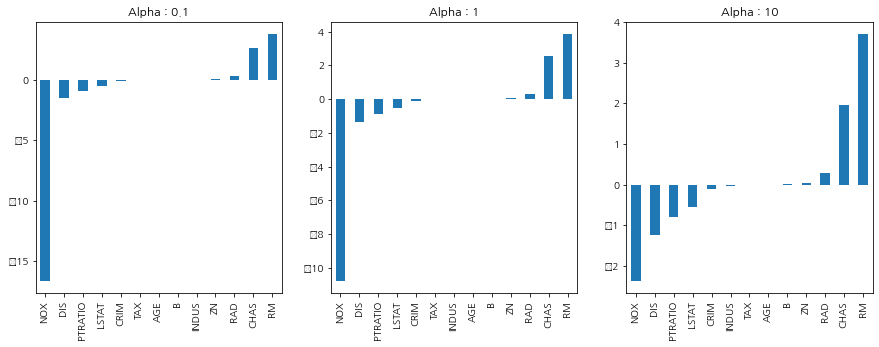

In [27]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
ridge01_coef.sort_values().plot(kind='bar')
plt.title('Alpha : 0.1')
plt.subplot(1, 3, 2)
ridge1_coef.sort_values().plot(kind='bar')
plt.title('Alpha : 1')
plt.subplot(1, 3, 3)
ridge10_coef.sort_values().plot(kind='bar')
plt.title('Alpha : 10')
plt.show()

## Lasso Regression

In [30]:

# 정규화
from sklearn.preprocessing import MinMaxScaler
X_sc = MinMaxScaler().fit_transform(X)

# 3차항 변환
from sklearn.preprocessing import PolynomialFeatures

P = PolynomialFeatures(degree = 3, include_bias = False) # 5차항 추가
X_poly = P.fit_transform(X_sc)

# 훈련, 평가 데이터로 분리
from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(
    X_poly, y, random_state = 0
)

# Ridge
from sklearn.linear_model import Lasso
model = Lasso().fit(x_tr, y_tr)

# 성능점수
print(model.score(x_tr, y_tr), model.score(x_te, y_te))
print("이 데이터는 Lasso 보다 Ridge를 적용한 것이 더 낫다")

0.2933995968826699 0.21247966404486662
이 데이터는 Lasso 보다 Ridge를 적용한 것이 더 낫다


In [31]:
import matplotlib.pyplot as plt

ridge01 = Lasso(alpha=0.1).fit(boston['data'], boston['target'])
ridge01_coef = pd.Series(ridge01.coef_, index=boston['feature_names'])

ridge1 = Lasso(alpha=1).fit(boston['data'], boston['target'])
ridge1_coef = pd.Series(ridge1.coef_, index=boston['feature_names'])

ridge10 = Lasso(alpha=10).fit(boston['data'], boston['target'])
ridge10_coef = pd.Series(ridge10.coef_, index=boston['feature_names'])

/Users/harin/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/harin/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


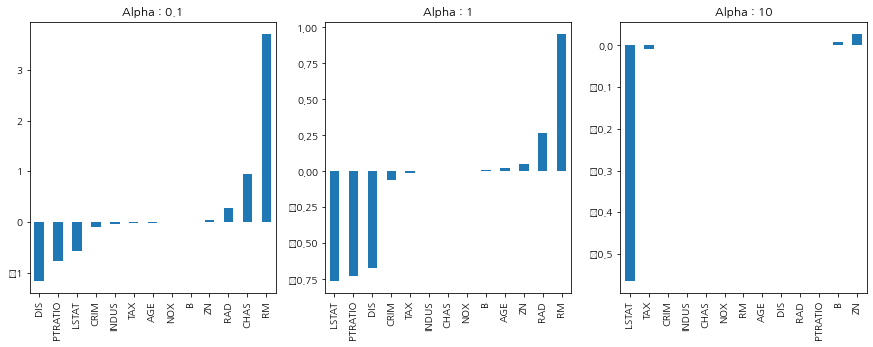

In [32]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
ridge01_coef.sort_values().plot(kind='bar')
plt.title('Alpha : 0.1')
plt.subplot(1, 3, 2)
ridge1_coef.sort_values().plot(kind='bar')
plt.title('Alpha : 1')
plt.subplot(1, 3, 3)
ridge10_coef.sort_values().plot(kind='bar')
plt.title('Alpha : 10')
plt.show()

## 팁 데이터셋

In [38]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### 원핫인코딩

In [45]:
import pandas as pd

tips_ohe = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips_ohe

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,1,0,0,1,0,0,1,0,0,1
240,27.18,2.00,2,0,1,1,0,0,0,1,0,0,1
241,22.67,2.00,2,1,0,1,0,0,0,1,0,0,1
242,17.82,1.75,2,1,0,0,1,0,0,1,0,0,1


### 데이터 분할

In [46]:
y = tips_ohe['tip']
X = tips_ohe.drop(columns = 'tip') # 숫자인 것만 추출

In [48]:
# 훈련, 평가 데이터로 분리
from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(
    X, y, random_state = 0
)

# 선형회귀
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_tr, y_tr)

# 성능점수
print(model.score(x_tr, y_tr), model.score(x_te, y_te))

0.43718265714767135 0.5156604446626033


- y = Wx + b
- P(확률) = ax + b 범위가 서로 다름. 0 ~ 1 = -무한대 ~ +무한대
- 확률 -> 오즈(Odds)로 변환
- Odds : 실패확률 대비 성공확률 (P(성공확률) / 1-P)
<br/>

- p / (1-P) = ax + b -> 0 ~ 무한대 
- log(Odds) = ax + b -> -무한대 ~ +무한대
    - = log(P / (1-P))
    - e^(log(P/(1-P)) = e^(ax +b)
    - P = 1 / 1 + e^(-wx)

# 위스콘신 주립대학 유방암 진단데이터

In [50]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# 데이터 분할
y = cancer['target']
X = cancer['data']

# 훈련, 평가 데이터로 분리
from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(
    X, y, random_state = 0, stratify=y # 분리비율 기준을 y값으로 분리
)

# 모델
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 10000).fit(x_tr, y_tr) # 충분히 반복하여 오차값의 최소값을 지나갈수 있도록 max_iter지정해준다.
# 최소값을 만나게 되면 멈춤

print(model.score(x_tr, y_tr), model.score(x_te, y_te))

# 모델
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier().fit(x_tr, y_tr)

print(model.score(x_tr, y_tr), model.score(x_te, y_te))

0.9671361502347418 0.9370629370629371
0.9460093896713615 0.916083916083916


# 타이타닉 데이터 생존율 예측

In [59]:
import seaborn as sns
ti = sns.load_dataset('titanic')
ti['age'] = ti['age'].fillna(ti['age'].mean())

# 데이터 분할
y = ti['survived']
X = ti[['age', 'pclass', 'sibsp', 'parch']]

# 훈련, 평가 데이터로 분리
from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(
    X, y, random_state = 0, stratify=y # 분리비율 기준을 y값으로 분리
)

# 모델
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 10000).fit(x_tr, y_tr) # 충분히 반복하여 오차값의 최소값을 지나갈수 있도록 max_iter지정해준다.
# 최소값을 만나게 되면 멈춤
print('logistic Regression')
print(model.score(x_tr, y_tr), model.score(x_te, y_te))
print()

# 모델
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier().fit(x_tr, y_tr)
print('KNN')
print(model.score(x_tr, y_tr), model.score(x_te, y_te))
print()

print('test값이 더 높은 모델로 ')

logistic Regression
0.7050898203592815 0.6816143497757847

KNN
0.7679640718562875 0.695067264573991

test값이 더 높은 모델로 


# 손글씨 데이터셋

In [60]:
from sklearn.datasets import load_digits
digits = load_digits()

digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [61]:
print(digits['images'][0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


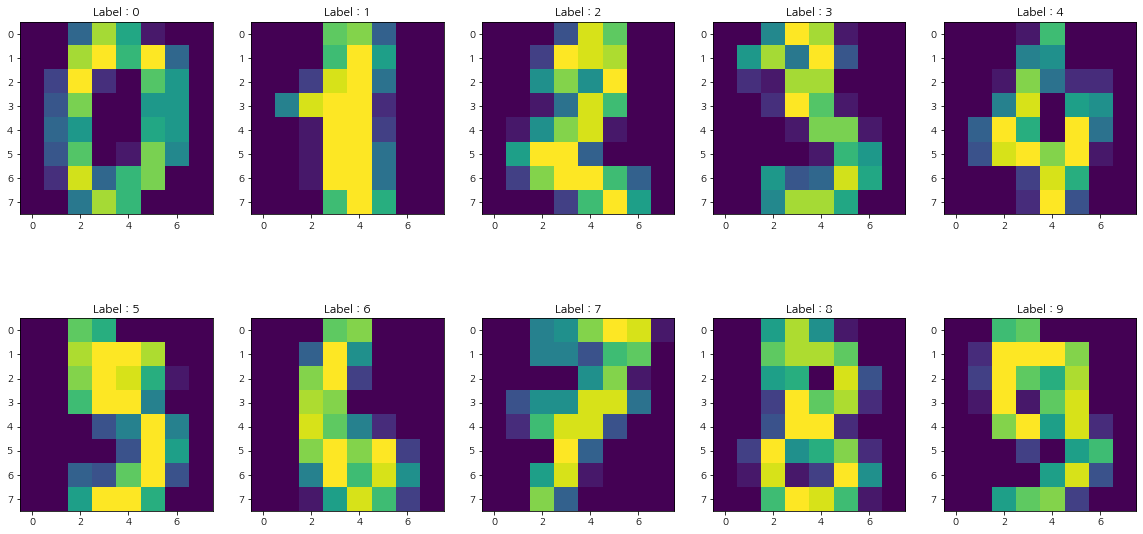

In [62]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

plt.figure(figsize=(20, 10))
for index, image in enumerate(digits['images'][:10]):
    plt.subplot(2, 5, index+1)
    plt.imshow(image)
    plt.title(f'Label : {digits.target[index]}')
plt.show()

In [63]:
x_train, x_test, y_train, y_test = train_test_split(digits['data'],
                                                    digits['target'],
                                                    stratify=digits['target'],
                                                    random_state=0)

model = LogisticRegression(max_iter=10000).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, 0.9644444444444444)

# 분류 분석 성능 평가

In [88]:
#  이진 분류를 위한 데이터세트 준비
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X, Y = cancer['data'], cancer['target']

# Train Test 분할
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [91]:
# 분류 알고리즘 생성 및 예측
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

knn = KNeighborsClassifier(n_neighbors=10).fit(X_train, Y_train)
knn_pred = knn.predict(X_test)

lr = LogisticRegression(max_iter=10000).fit(X_train, Y_train)
lr_pred = lr.predict(X_test)

dtc = DecisionTreeClassifier(max_depth=3).fit(X_train, Y_train)
dtc_pred = dtc.predict(X_test)

rfc = RandomForestClassifier(max_depth=3).fit(X_train, Y_train)
rfc_pred = rfc.predict(X_test)

gbc = GradientBoostingClassifier(max_depth=3).fit(X_train, Y_train)
gbc_pred = gbc.predict(X_test)

svm = SVC().fit(X_train, Y_train)
svm_pred = svm.predict(X_test)

mlp = MLPClassifier().fit(X_train, Y_train)
mlp_pred = mlp.predict(X_test)

In [92]:
# 모델별 정확도 (accuracy) 출력
print('KNN 정확도 : %.2f%%' % (knn.score(X_test, Y_test) * 100))
print('Logistic Regression 정확도 : %.2f%%' % (lr.score(X_test, Y_test) * 100))
print('Decision Tree 정확도 : %.2f%%' % (dtc.score(X_test, Y_test) * 100))
print('Random Forest 정확도 : %.2f%%' % (rfc.score(X_test, Y_test) * 100))
print('Gradient Boosting 정확도 : %.2f%%' % (gbc.score(X_test, Y_test) * 100))
print('SVM 정확도 : %.2f%%' % (svm.score(X_test, Y_test) * 100))
print('MLP 정확도 : %.2f%%' % (mlp.score(X_test, Y_test) * 100))

KNN 정확도 : 95.10%
Logistic Regression 정확도 : 95.80%
Decision Tree 정확도 : 90.21%
Random Forest 정확도 : 94.41%
Gradient Boosting 정확도 : 94.41%
SVM 정확도 : 94.41%
MLP 정확도 : 96.50%


In [93]:
# ROC Curve를 위한 fpr 및 tpr 계산
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(Y_test, knn_pred) # 실제값 예측값
fpr, tpr, thresholds

(array([0.        , 0.03921569, 1.        ]),
 array([0.        , 0.94565217, 1.        ]),
 array([2, 1, 0]))

In [94]:
# AUC 계산
from sklearn.metrics import auc
knn_auc = auc(fpr, tpr) # RoC Curve를 그리는 요소인 fpr, tpr
knn_auc

0.9532182438192668

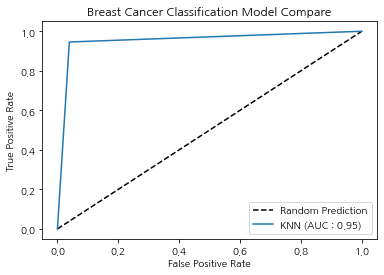

In [95]:
# Roc Curve 시각화
import matplotlib.pyplot as plt
label = "KNN (AUC : %.2f)" % knn_auc 
plt.plot([0, 1], [0, 1], 'k--', label="Random Prediction")
plt.plot(fpr, tpr, label=label)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Breast Cancer Classification Model Compare')
plt.legend()
plt.show()

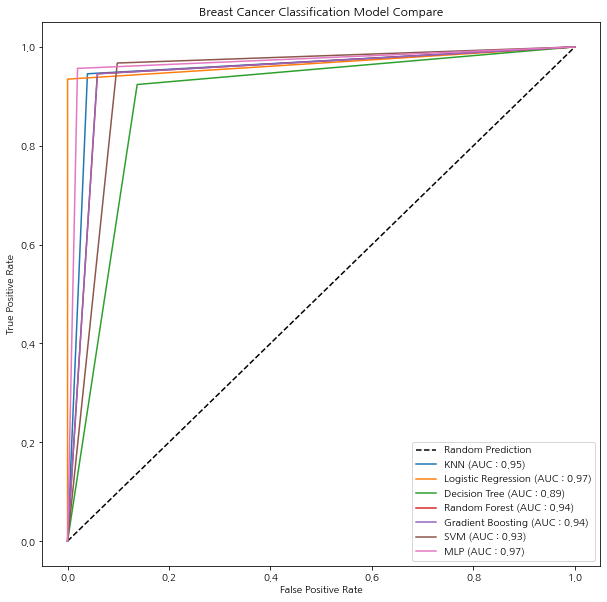

In [96]:
# 분류 알고리즘 ROC Curve 시각화
plt.figure(figsize=(10,10))

plt.plot([0, 1], [0, 1], 'k--', label="Random Prediction")

alogs = ['KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest', 
        'Gradient Boosting','SVM', 'MLP']
preds = [knn_pred, lr_pred, dtc_pred, rfc_pred, gbc_pred, svm_pred, mlp_pred]

for alog, pred in zip(alogs, preds):
    fpr, tpr, thresholds = roc_curve(Y_test, pred)
    roc_auc = auc(fpr, tpr)
    label = "%s (AUC : %.2f)" % (alog, roc_auc)
    plt.plot(fpr, tpr, label=label)
    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Breast Cancer Classification Model Compare')
plt.legend()
plt.show()

# 타이타닉 데이터셋의 알고리즘별 분류 분석 평가
- 성별도 특성에 포함시키기

In [138]:
import seaborn as sns
ti = sns.load_dataset('titanic')

import pandas as pd

ti_ohe = pd.get_dummies(ti, columns=['sex'])
ti_ohe['age'] = ti['age'].fillna(ti_ohe['age'].mean())
ti_ohe

# 데이터 분할
Y = ti_ohe[['survived']]
X = ti_ohe[['age', 'pclass', 'sibsp', 'parch', 'sex_female', 'sex_male']]

In [161]:
# Train Test 분할
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, stratify=Y)

In [162]:
# 분류 알고리즘 생성 및 예측
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

knn = KNeighborsClassifier(n_neighbors=10).fit(X_train, Y_train)
knn_pred = knn.predict(X_test)

lr = LogisticRegression(max_iter=5000000).fit(X_train, Y_train)
lr_pred = lr.predict(X_test)

dtc = DecisionTreeClassifier(max_depth=3).fit(X_train, Y_train)
dtc_pred = dtc.predict(X_test)

rfc = RandomForestClassifier(max_depth=3).fit(X_train, Y_train)
rfc_pred = rfc.predict(X_test)

gbc = GradientBoostingClassifier(max_depth=3).fit(X_train, Y_train)
gbc_pred = gbc.predict(X_test)

svm = SVC().fit(X_train, Y_train)
svm_pred = svm.predict(X_test)

mlp = MLPClassifier().fit(X_train, Y_train)
mlp_pred = mlp.predict(X_test)

/Users/harin/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/harin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/var/folders/rl/1rszx_6s765__41xlbvwvlmw0000gn/T/ipykernel_63122/2827809125.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc = RandomForestClassifier(max_depth=3).fit(X_train, Y_train)
/Users/harin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d

In [163]:
# 모델별 정확도 (accuracy) 출력
print('KNN 정확도 : %.2f%%' % (knn.score(X_test, Y_test) * 100))
print('Logistic Regression 정확도 : %.2f%%' % (lr.score(X_test, Y_test) * 100))
print('Decision Tree 정확도 : %.2f%%' % (dtc.score(X_test, Y_test) * 100))
print('Random Forest 정확도 : %.2f%%' % (rfc.score(X_test, Y_test) * 100))
print('Gradient Boosting 정확도 : %.2f%%' % (gbc.score(X_test, Y_test) * 100))
print('SVM 정확도 : %.2f%%' % (svm.score(X_test, Y_test) * 100))
print('MLP 정확도 : %.2f%%' % (mlp.score(X_test, Y_test) * 100))

KNN 정확도 : 76.23%
Logistic Regression 정확도 : 77.58%
Decision Tree 정확도 : 78.48%
Random Forest 정확도 : 79.82%
Gradient Boosting 정확도 : 81.61%
SVM 정확도 : 66.82%
MLP 정확도 : 79.82%


In [164]:
# ROC Curve를 위한 fpr 및 tpr 계산
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(Y_test, knn_pred) # 실제값 예측값
fpr, tpr, thresholds

(array([0.        , 0.06569343, 1.        ]),
 array([0.        , 0.48837209, 1.        ]),
 array([2, 1, 0]))

In [165]:
# AUC 계산
from sklearn.metrics import auc
knn_auc = auc(fpr, tpr) # RoC Curve를 그리는 요소인 fpr, tpr
knn_auc

0.7113393311831607

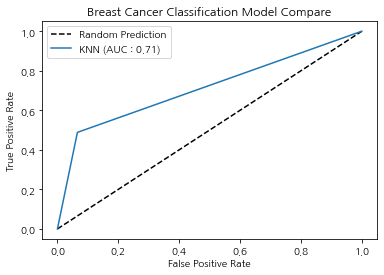

In [166]:
# Roc Curve 시각화
import matplotlib.pyplot as plt
label = "KNN (AUC : %.2f)" % knn_auc 
plt.plot([0, 1], [0, 1], 'k--', label="Random Prediction")
plt.plot(fpr, tpr, label=label)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Breast Cancer Classification Model Compare')
plt.legend()
plt.show()

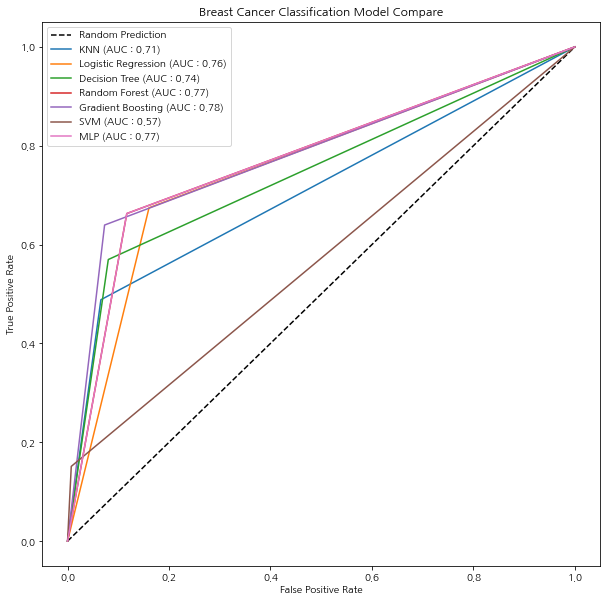

In [167]:
# 분류 알고리즘 ROC Curve 시각화
plt.figure(figsize=(10,10))

plt.plot([0, 1], [0, 1], 'k--', label="Random Prediction")

alogs = ['KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest', 
        'Gradient Boosting','SVM', 'MLP']
preds = [knn_pred, lr_pred, dtc_pred, rfc_pred, gbc_pred, svm_pred, mlp_pred]

for alog, pred in zip(alogs, preds):
    fpr, tpr, thresholds = roc_curve(Y_test, pred)
    roc_auc = auc(fpr, tpr)
    label = "%s (AUC : %.2f)" % (alog, roc_auc)
    plt.plot(fpr, tpr, label=label)
    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Breast Cancer Classification Model Compare')
plt.legend()
plt.show()